In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import re

In [2]:

file_path = "../data/survey.csv"

column_names = [
    "Timestamp", "Age", "Gender", "Country", "State", "Self_Employed",
    "Family_History", "Treatment", "Work_Interfere", "No_Employees",
    "Remote_Work", "Tech_Company", "Benefits", "Care_Options",
    "Wellness_Program", "Seek_Help", "Anonymity", "Leave",
    "Mental_Health_Consequence", "Phys_Health_Consequence",
    "Coworkers", "Supervisor", "Mental_Health_Interview",
    "Phys_Health_Interview", "Mental_vs_Physical", "Obs_Consequence",
    "Comments"
]

df = pd.read_csv(file_path, names=column_names, header=None)

# Verify the dataset is loaded correctly
print("DataFrame Loaded Successfully")
print(df.head())  # Display first few rows
print(df.columns)  # Check column names


DataFrame Loaded Successfully
             Timestamp  Age  Gender         Country  State  Self_Employed  \
0            Timestamp  Age  Gender         Country  state  self_employed   
1  2014-08-27 11:29:31   37  Female   United States     IL            NaN   
2  2014-08-27 11:29:37   44       M   United States     IN            NaN   
3  2014-08-27 11:29:44   32    Male          Canada    NaN            NaN   
4  2014-08-27 11:29:46   31    Male  United Kingdom    NaN            NaN   

   Family_History  Treatment  Work_Interfere    No_Employees  ...  \
0  family_history  treatment  work_interfere    no_employees  ...   
1              No        Yes           Often            6-25  ...   
2              No         No          Rarely  More than 1000  ...   
3              No         No          Rarely            6-25  ...   
4             Yes        Yes           Often          26-100  ...   

                Leave  Mental_Health_Consequence  Phys_Health_Consequence  \
0              

In [3]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9]', '', text)
    return text

In [4]:
df.fillna("Unknown", inplace=True)

In [5]:
df.columns = df.columns.str.strip().str.lower()  
selected_features = ['family_history', 'work_interfere', 'mental_vs_physical', 'coworkers', 'leave', 'benefits', 'treatment']
df = df[[col for col in selected_features if col in df.columns]]  

In [6]:
df = df.map(clean_text)

In [7]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col]).astype(float)



In [8]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1]).astype(float)

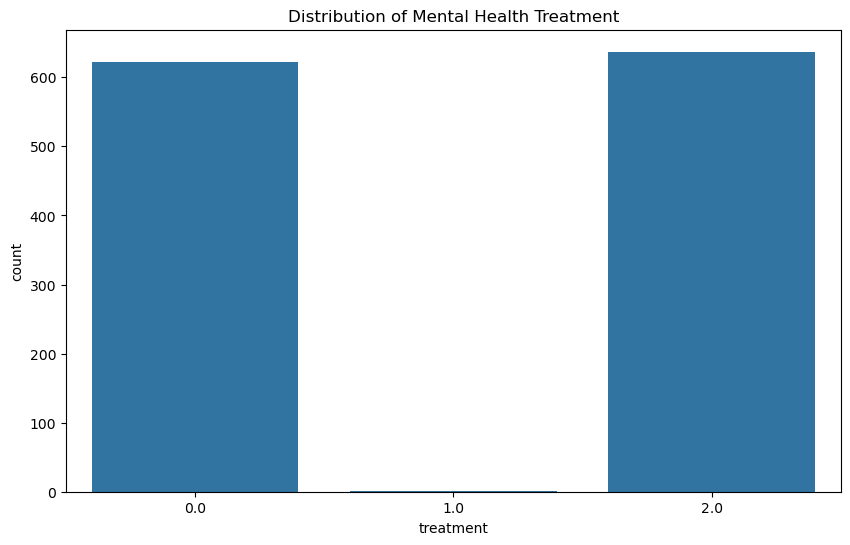

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='treatment', data=df)
plt.title("Distribution of Mental Health Treatment")
plt.show()

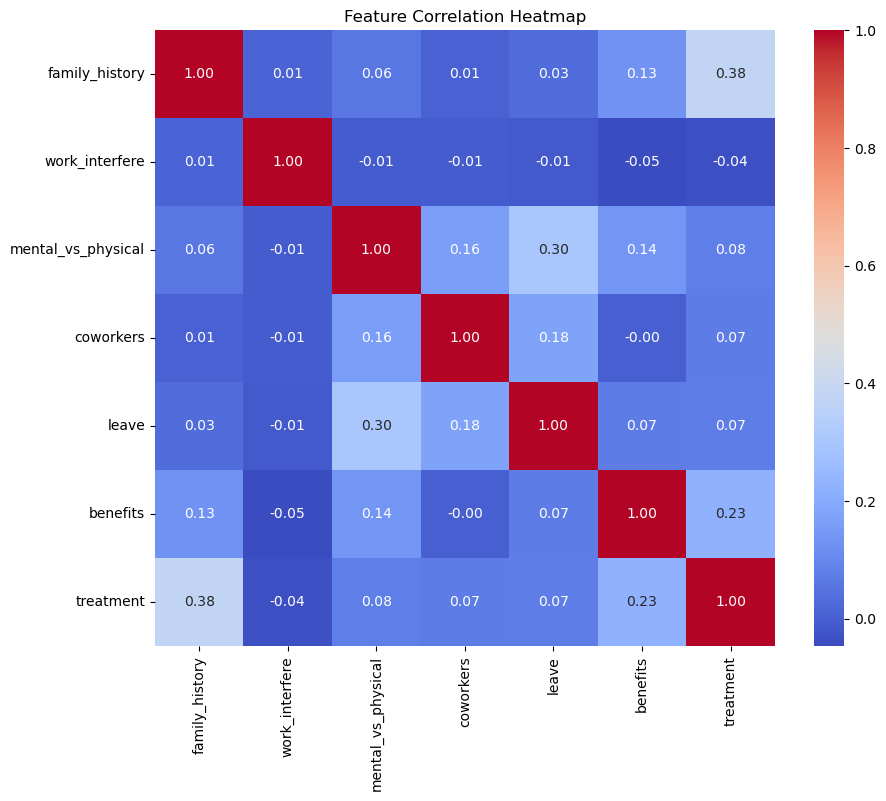

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
x = df.drop(columns=['treatment'])
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print("Data preparation complete. Training samples:", len(X_train))


Data preparation complete. Training samples: 1008


In [13]:
train_data = pd.DataFrame(X_train)
test_data = pd.DataFrame(X_test)

train_data['treatment'] = y_train
test_data['treatment'] = y_test

In [14]:
train_data.to_csv('../data/train_data.csv', index=False)
test_data.to_csv('../data/test_data.csv', index=False)

In [15]:
print("Processed data saved")

Processed data saved


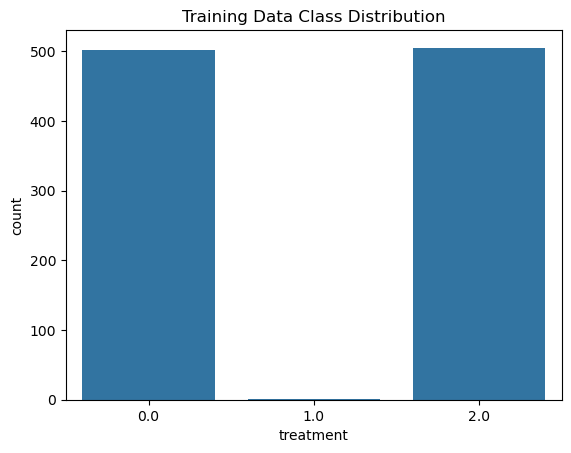

treatment
2.0    0.500992
0.0    0.498016
1.0    0.000992
Name: proportion, dtype: float64


In [16]:
sns.countplot(x=train_data['treatment'])
plt.title("Training Data Class Distribution")
plt.show()

# Print actual counts
print(train_data['treatment'].value_counts(normalize=True))  # Percentage of each class